In [1]:
# let's start this task by importing necessary python libraies:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.corpus import stopwords
import string
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data=pd.read_csv('Myntra kurtis.csv')
data.head()

,Brand Name,Product URL,Image,Product Ratings,Number of ratings,Product Info,Selling Price,Price,Discount
0,Rain & Rainbow,https://www.myntra.com/kurtis/rain--rainbow/ra...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,28,Printed Pure Cotton Kurti,837.0,1395.0,(40% OFF)
1,HERE&NOW,https://www.myntra.com/kurtis/herenow/herenow-...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,805,Embroidered Pure Cotton A-Line Kurti,719.0,1799.0,(60% OFF)
2,Anouk,https://www.myntra.com/kurtis/anouk/anouk-wome...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,2800,Printed Pure Cotton Indigo Anarkali Kurta,594.0,1699.0,(65% OFF)
3,Anubhutee,https://www.myntra.com/kurtis/anubhutee/anubhu...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.3,1100,Ethnic Motifs Printed Kurti,521.0,1739.0,(70% OFF)
4,GERUA,https://www.myntra.com/kurtis/gerua/gerua-wome...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,157,Ethnic Motifs Printed Kurti,449.0,1499.0,(70% OFF)


In [3]:
data.shape

(599, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand Name         599 non-null    object 
 1   Product URL        599 non-null    object 
 2   Image              132 non-null    object 
 3   Product Ratings    401 non-null    float64
 4   Number of ratings  599 non-null    int64  
 5   Product Info       599 non-null    object 
 6   Selling Price      525 non-null    float64
 7   Price              525 non-null    float64
 8   Discount           525 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 42.2+ KB


In [5]:
# let's have a look if the dataset contains any null values or not:
data.isnull().sum()

Brand Name             0
Product URL            0
Image                467
Product Ratings      198
Number of ratings      0
Product Info           0
Selling Price         74
Price                 74
Discount              74
dtype: int64

The dataset has some null values, but there are 467 null values in the image column,where the total number of rows in the data 600. so i will delete the image column.

In [6]:
data = data.drop('Image',axis=1)

Now let's drop the null values present in the other columns in the dataset.

In [7]:
data = data.dropna()

In [8]:
# now let's have a look at the shape of the dataset.
data.shape

(364, 8)

so there are 364 rows present in the dataset,after removing all null values.

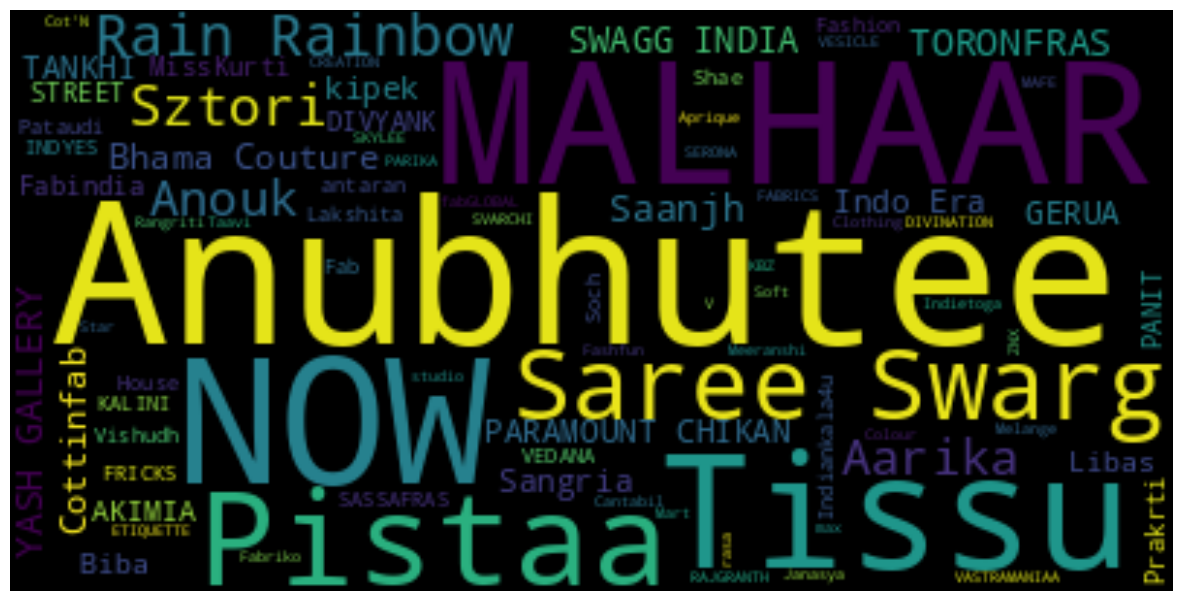

In [9]:
text = " ".join(i for i in data['Brand Name'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color='black').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

so brand like Anubhutee,malhaar,pistaa,now,tissu and swarg are popular for kurtis on myntra.

In [10]:
data.head(3)

,Brand Name,Product URL,Product Ratings,Number of ratings,Product Info,Selling Price,Price,Discount
0,Rain & Rainbow,https://www.myntra.com/kurtis/rain--rainbow/ra...,4.2,28,Printed Pure Cotton Kurti,837.0,1395.0,(40% OFF)
1,HERE&NOW,https://www.myntra.com/kurtis/herenow/herenow-...,4.2,805,Embroidered Pure Cotton A-Line Kurti,719.0,1799.0,(60% OFF)
2,Anouk,https://www.myntra.com/kurtis/anouk/anouk-wome...,4.2,2800,Printed Pure Cotton Indigo Anarkali Kurta,594.0,1699.0,(65% OFF)


In [14]:
highest_rated = data.sort_values(by=['Product Ratings'],ascending=False)

highest_rated = highest_rated.head(10)


In [15]:
print(highest_rated[['Product Info','Product Ratings','Brand Name']])

                        Product Info  Product Ratings        Brand Name
435            Mandarin Collar Kurti              5.0            INDYES
249      Floral Printed Kaftan Kurta              5.0           Sangria
448          Solid Pure Cotton Kurti              5.0           MALHAAR
308             Floral Printed Kurti              5.0           MALHAAR
538                Pure Cotton Kurti              5.0           MALHAAR
277    Women Solid Embellished Kurti              5.0          Fabindia
515     Chikankari Embroidered Kurti              5.0  PARAMOUNT CHIKAN
62       Ethnic Motifs Printed Kurti              4.9              Biba
80   Ethnic Motifs Embroidered Kurti              4.8           Sangria
450      Self Striped Straight Kurti              4.8            Saanjh


So, brands like indyes,sangria,malhaar,fabindia,paramount chikan,biba and saanjh are selling the highest rated kurtis on myntra.

**Recommending Fashion Products**

To recommend the trending fashion,we can not use the content-based filtering strategy, the content based filtering strategy is good to use when a user is looking at a fashion product, and your application wants to recommended something similar.

To recommend the trend fashion, we can find weighted average of all the rating and recommend the products based on the weighted average ratings. To count the weighted score of all the rating of kurtis, we need:


Mean rating(mr): The mean rating of all the products

minimum rating(m): Minimum number of ratings.

number of ratings(n):Total number of ratings of the product.

average rating(a): average ratings of the products.

now below is the formula to calculate the weighted score of the product ratings:

score = (n/(n+m)* a)+(m/(m+n)* mr)



**Now let’s calculate the weighted score and recommend the most trending Kurtis on Myntra:**

In [25]:
mr = data['Product Ratings'].mean()

m = data['Number of ratings'].quantile(0.9)

n = data['Number of ratings']

a = data['Product Ratings']

In [26]:
data['Score'] = (n/(n+m)*a) +(m/(m+n) *mr)

In [30]:
recommened = data.sort_values('Score',ascending=False)

recommened.head(10)

,Brand Name,Product URL,Product Ratings,Number of ratings,Product Info,Selling Price,Price,Discount,Score
48,Tissu,https://www.myntra.com/kurtis/tissu/tissu-wome...,4.4,1000,Women Floral Print A-Line Kurti,549.0,999.0,(45% OFF),4.338320
11,Anubhutee,https://www.myntra.com/kurtis/anubhutee/anubhu...,4.4,480,Ethnic Motifs Printed Kurti,521.0,1739.0,(70% OFF),4.300868
155,Anubhutee,https://www.myntra.com/kurtis/anubhutee/anubhu...,4.4,447,Women Printed Kurti,486.0,1739.0,(72% OFF),4.296895
66,YASH GALLERY,https://www.myntra.com/kurtis/yash-gallery/yas...,4.5,223,Printed A-Line Kurti,629.0,1399.0,(55% OFF),4.295568
27,Anubhutee,https://www.myntra.com/kurtis/anubhutee/anubhu...,4.3,1500,Women Printed Straight Kurti,521.0,1739.0,(70% OFF),4.274815
102,AKIMIA,https://www.myntra.com/kurtis/akimia/akimia-se...,4.5,165,Embroidered Pure Cotton Kurti,767.0,1599.0,(52% OFF),4.273667
88,Tissu,https://www.myntra.com/kurtis/tissu/tissu-wome...,4.3,1100,Women Floral Printed Straight Kurti,548.0,899.0,(39% OFF),4.267992
3,Anubhutee,https://www.myntra.com/kurtis/anubhutee/anubhu...,4.3,1100,Ethnic Motifs Printed Kurti,521.0,1739.0,(70% OFF),4.267992
42,Rain & Rainbow,https://www.myntra.com/kurtis/rain--rainbow/ra...,4.4,251,Women Printed Pure Cotton Pure Cotton A-Line K...,797.0,1595.0,(50% OFF),4.264685
18,GERUA,https://www.myntra.com/kurtis/gerua/gerua-wome...,4.6,98,Ethnic Motifs Printed Kurti,449.0,1499.0,(70% OFF),4.262359


In [32]:
print(recommened[['Brand Name', 'Product Info',
                       'Product Ratings', 'Score',
                       'Selling Price', 'Discount']].head(10))

         Brand Name                                       Product Info  \
48            Tissu                    Women Floral Print A-Line Kurti   
11        Anubhutee                        Ethnic Motifs Printed Kurti   
155       Anubhutee                                Women Printed Kurti   
66     YASH GALLERY                               Printed A-Line Kurti   
27        Anubhutee                       Women Printed Straight Kurti   
102          AKIMIA                      Embroidered Pure Cotton Kurti   
88            Tissu                Women Floral Printed Straight Kurti   
3         Anubhutee                        Ethnic Motifs Printed Kurti   
42   Rain & Rainbow  Women Printed Pure Cotton Pure Cotton A-Line K...   
18            GERUA                        Ethnic Motifs Printed Kurti   

     Product Ratings     Score  Selling Price   Discount  
48               4.4  4.338320          549.0  (45% OFF)  
11               4.4  4.300868          521.0  (70% OFF)  
155     

**Summary**


A fashion recommendation system is an application that recommends the most trending fashion based on the user’s search query. Myntra is one of the popular e-commerce platforms known for its fashion recommendations. I hope you liked this article on building a fashion recommendation system using Python